In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
pwd

'C:\\Users\\pc889'

In [3]:
# Import train & test dataset
train = pd.read_csv(r"C:\Users\pc889\Documents\Kaggle\train_houseprice.csv")      
test = pd.read_csv(r"C:\Users\pc889\Documents\Kaggle\test_houseprice.csv")  

In [4]:
train.shape

(1460, 81)

In [5]:
test.shape

(1459, 80)

In [6]:
train.isnull().sum().sort_values(ascending=False)[:19]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [7]:
test.isnull().sum().sort_values(ascending=False)[:30]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
dtype: int64

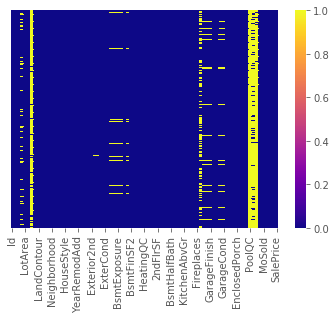

In [8]:
sns.heatmap(train.isnull(),yticklabels=False, cmap='plasma')

In [9]:
# Replace NA values for LotFrontage with Mean
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())

In [10]:
train.LotFrontage.isnull().sum()

0

In [11]:
# Check values for column Alley
train.Alley.value_counts(dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [12]:
train.drop(columns=['Alley'], inplace=True)

In [13]:
# Check values for column Alley
test.Alley.value_counts(dropna=False)

NaN     1352
Grvl      70
Pave      37
Name: Alley, dtype: int64

In [14]:
# To Drop column Alley
test.drop(columns=['Alley'], inplace=True)

In [15]:
list1=['BsmtQual', 'FireplaceQu', 'GarageType', 'GarageCond', 'GarageFinish', 'GarageQual', 'MasVnrType', 'MasVnrArea',
         'BsmtExposure','BsmtFinType2','BsmtCond']

for item in list1:
    train[item] = train[item].fillna(train[item].mode()[0])
    test[item] = test[item].fillna(train[item].mode()[0])

In [16]:
list1 = ['GarageYrBlt', 'PoolQC', 'Fence', 'MiscFeature']

for item in list1:
    train.drop(columns=item, inplace=True)
    test.drop(columns=item, inplace=True)

In [17]:
train.isnull().sum().sort_values(ascending=False)

BsmtFinType1     37
Electrical        1
SalePrice         0
ExterQual         0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
Foundation        0
ExterCond         0
BsmtUnfSF         0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinSF1        0
BsmtFinType2      0
YearRemodAdd      0
YearBuilt         0
OverallCond       0
OverallQual       0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
                 ..
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
GarageFinish      0
FireplaceQu       0
Heating           0
Fireplaces        0
HeatingQC         0
CentralAir        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0


In [18]:
train.dropna(inplace=True)

In [19]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [20]:
train.drop(columns=['Id'], inplace = True)

In [21]:
train.shape

(1422, 75)

In [22]:
test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].mean())

In [23]:
test.isnull().sum().sort_values(ascending=False)

BsmtFinType1     42
MSZoning          4
Utilities         2
BsmtFullBath      2
BsmtHalfBath      2
Functional        2
GarageCars        1
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
SaleType          1
Exterior2nd       1
Exterior1st       1
KitchenQual       1
TotalBsmtSF       1
GarageArea        1
Condition2        0
MSSubClass        0
BsmtCond          0
LotFrontage       0
LotArea           0
Street            0
BsmtQual          0
Foundation        0
ExterCond         0
ExterQual         0
MasVnrArea        0
MasVnrType        0
LotShape          0
LandContour       0
                 ..
GarageType        0
YrSold            0
MoSold            0
MiscVal           0
PoolArea          0
ScreenPorch       0
3SsnPorch         0
EnclosedPorch     0
OpenPorchSF       0
WoodDeckSF        0
PavedDrive        0
GarageCond        0
GarageQual        0
GarageFinish      0
FireplaceQu       0
Heating           0
Fireplaces        0
TotRmsAbvGrd      0
KitchenAbvGr      0


In [24]:
test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])

In [25]:
columns = ['BsmtFinType1', 'Utilities','BsmtFullBath', 'BsmtHalfBath', 'Functional', 'SaleType', 'Exterior2nd', 
           'Exterior1st', 'KitchenQual']
columns1 = ['GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',  'TotalBsmtSF', 'GarageArea']

for item in columns:
    test[item] = test[item].fillna(test[item].mode()[0])

for item in columns1:
    test[item] = test[item].fillna(test[item].mean())

In [26]:
test.drop(columns=['Id'], inplace=True)

In [27]:
test.shape

(1459, 74)

In [28]:
test.isnull().any().any()

False

In [29]:
train.LotConfig.value_counts(dropna=False)

Inside     1023
Corner      257
CulDSac      92
FR2          46
FR3           4
Name: LotConfig, dtype: int64

In [30]:
train.LotConfig.unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [31]:
columns = ['MSZoning', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [32]:
final_df = pd.concat([train, test], axis=0)

In [33]:
final_df.shape

(2881, 75)

In [34]:
def One_hot_encoding(columns):
    df_final=final_df
    i=0
    for fields in columns:
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:           
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [35]:
final_df = One_hot_encoding(columns)

In [36]:
final_df.shape

(2881, 235)

In [37]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [38]:
final_df.shape

(2881, 175)

In [39]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [40]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [41]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [42]:
X_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,1,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,1,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,1,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,1,0,0,0,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,1,0,0,0,1,0


In [43]:
y_train.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [44]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier()

from sklearn.model_selection import RandomizedSearchCV

In [45]:
n_estimators = [100, 500, 900]
criterion = ['gini', 'entropy']
depth = [3,5,10,15]
min_split=[2,3,4]
min_leaf=[2,3,4]
bootstrap = ['True', 'False']
verbose = [5]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':depth,
    'criterion':criterion,
    'bootstrap':bootstrap,
    'verbose':verbose,
    'min_samples_split':min_split,
    'min_samples_leaf':min_leaf
    }

random_cv = RandomizedSearchCV(estimator=regressor,
                               param_distributions=hyperparameter_grid,
                               cv=5, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = 4, 
                               return_train_score = True,
                               random_state=42)

In [46]:
random_cv.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

building tree 340 of 500
building tree 341 of 500
building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   16.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [44]:
random_cv.best_estimator_

RandomForestClassifier(bootstrap='False', ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=5, warm_start=False)

In [45]:
regressor = RandomForestClassifier(bootstrap='False', class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=3, min_weight_fraction_leaf=0.0,
                       n_estimators=900, n_jobs=None, oob_score=False,
                       random_state=None, verbose=5, warm_start=False)

In [46]:
regressor.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 900
building tree 2 of 900
building tree 3 of 900
building tree 4 of 900
building tree 5 of 900
building tree 6 of 900
building tree 7 of 900
building tree 8 of 900
building tree 9 of 900
building tree 10 of 900
building tree 11 of 900
building tree 12 of 900
building tree 13 of 900
building tree 14 of 900
building tree 15 of 900
building tree 16 of 900
building tree 17 of 900
building tree 18 of 900
building tree 19 of 900
building tree 20 of 900
building tree 21 of 900
building tree 22 of 900
building tree 23 of 900
building tree 24 of 900
building tree 25 of 900
building tree 26 of 900
building tree 27 of 900
building tree 28 of 900
building tree 29 of 900
building tree 30 of 900
building tree 31 of 900
building tree 32 of 900
building tree 33 of 900
building tree 34 of 900
building tree 35 of 900
building tree 36 of 900
building tree 37 of 900
building tree 38 of 900
building tree 39 of 900
building tree 40 of 900
building tree 41 of 900
building tree 42 of 900
b

building tree 339 of 900
building tree 340 of 900
building tree 341 of 900
building tree 342 of 900
building tree 343 of 900
building tree 344 of 900
building tree 345 of 900
building tree 346 of 900
building tree 347 of 900
building tree 348 of 900
building tree 349 of 900
building tree 350 of 900
building tree 351 of 900
building tree 352 of 900
building tree 353 of 900
building tree 354 of 900
building tree 355 of 900
building tree 356 of 900
building tree 357 of 900
building tree 358 of 900
building tree 359 of 900
building tree 360 of 900
building tree 361 of 900
building tree 362 of 900
building tree 363 of 900
building tree 364 of 900
building tree 365 of 900
building tree 366 of 900
building tree 367 of 900
building tree 368 of 900
building tree 369 of 900
building tree 370 of 900
building tree 371 of 900
building tree 372 of 900
building tree 373 of 900
building tree 374 of 900
building tree 375 of 900
building tree 376 of 900
building tree 377 of 900
building tree 378 of 900


building tree 670 of 900
building tree 671 of 900
building tree 672 of 900
building tree 673 of 900
building tree 674 of 900
building tree 675 of 900
building tree 676 of 900
building tree 677 of 900
building tree 678 of 900
building tree 679 of 900
building tree 680 of 900
building tree 681 of 900
building tree 682 of 900
building tree 683 of 900
building tree 684 of 900
building tree 685 of 900
building tree 686 of 900
building tree 687 of 900
building tree 688 of 900
building tree 689 of 900
building tree 690 of 900
building tree 691 of 900
building tree 692 of 900
building tree 693 of 900
building tree 694 of 900
building tree 695 of 900
building tree 696 of 900
building tree 697 of 900
building tree 698 of 900
building tree 699 of 900
building tree 700 of 900
building tree 701 of 900
building tree 702 of 900
building tree 703 of 900
building tree 704 of 900
building tree 705 of 900
building tree 706 of 900
building tree 707 of 900
building tree 708 of 900
building tree 709 of 900


[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   30.6s finished


RandomForestClassifier(bootstrap='False', ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=5, warm_start=False)

In [47]:
y_pred = regressor.predict(df_Test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    8.2s finished


In [48]:
y_pred

array([129000., 157900., 173000., ..., 168000.,  93500., 250000.])

In [49]:
pred=pd.DataFrame(y_pred)
samp = pd.read_csv(r"C:\Users\pc889\Documents\Kaggle\test_houseprice.csv")

In [50]:
sub = pd.concat([samp['Id'],pred], axis=1)
sub.columns=['Id','SalePrice']

In [51]:
sub.to_csv('Submit.csv', index=False)

In [70]:
sub.head()

,Id,SalePrice
0,1461,110000.0
1,1462,157900.0
2,1463,173000.0
3,1464,181000.0
4,1465,153900.0


In [71]:
import xgboost

In [72]:
regressor=xgboost.XGBRegressor()

In [73]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [74]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   47.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 14.2min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 22.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbt

In [75]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [76]:
regressor = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [77]:
regressor.fit(X_train,y_train)

[00:41:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { importance_type, missing, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [78]:
y_pred = regressor.predict(df_Test)

In [79]:
y_pred

array([114042.1 , 164575.23, 190523.47, ..., 175098.2 , 117959.04,
       233386.06], dtype=float32)

In [80]:
pred=pd.DataFrame(y_pred)
samp = pd.read_csv(r"C:\Users\pc889\Documents\Kaggle\test_houseprice.csv")
sub = pd.concat([samp['Id'],pred], axis=1)
sub.columns=['Id','SalePrice']

In [81]:
sub

,Id,SalePrice
0,1461,114042.101562
1,1462,164575.234375
2,1463,190523.468750
3,1464,198186.234375
4,1465,189446.468750
5,1466,172699.109375
6,1467,169128.484375
7,1468,167133.718750
8,1469,182196.750000
9,1470,129478.179688


In [82]:
sub.to_csv('My_sub1.csv',index=False)